In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

C:\Users\Vansh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [19]:
df=pd.read_csv(r"C:\Users\Vansh\AAPL.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-22,10.952857,11.191429,10.923929,11.191429,9.486750,393075200
1,2010-11-23,11.087500,11.133929,10.948571,11.026071,9.346576,519447600
2,2010-11-24,11.142857,11.264286,11.133929,11.242857,9.530339,413725200
3,2010-11-26,11.205000,11.346429,11.176429,11.250000,9.536398,237585600
4,2010-11-29,11.267857,11.338571,11.120714,11.316786,9.593010,445785200
...,...,...,...,...,...,...,...
3267,2023-11-15,187.850006,189.500000,187.779999,188.009995,188.009995,53790500
3268,2023-11-16,189.570007,190.960007,188.649994,189.710007,189.710007,54412900
3269,2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
3270,2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100


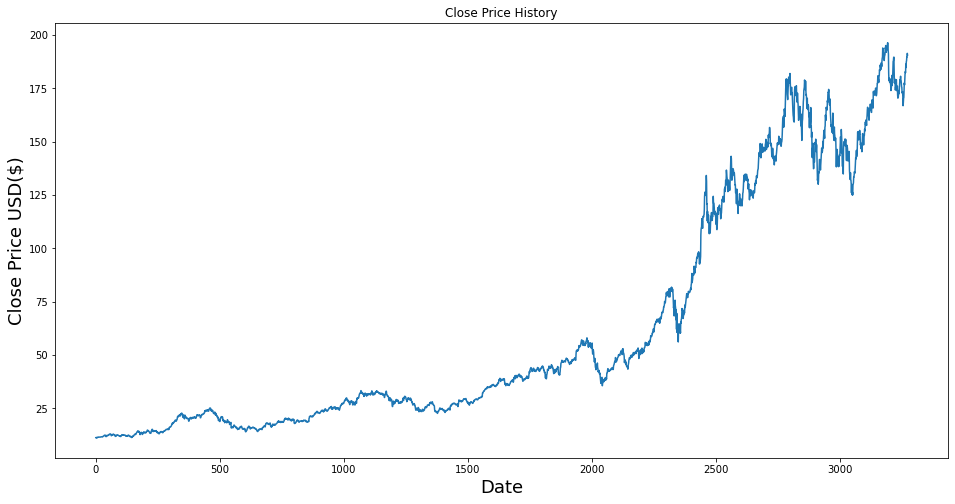

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [23]:
data=df.filter(['Close'])
dataset=data.values
training_dataset_len=math.ceil(len(dataset)* .8 )
training_dataset_len

2618

In [24]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[8.91783512e-04],
       [0.00000000e+00],
       [1.16913715e-03],
       ...,
       [9.63543027e-01],
       [9.73034764e-01],
       [9.68666406e-01]])

In [30]:
train_data=scaled_data[0:training_dataset_len,:]
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00089178, 0.        , 0.00116914, 0.00120766, 0.00156784,
       0.00046612, 0.00147731, 0.00181438, 0.00167763, 0.0021996 ,
       0.00182593, 0.00236524, 0.00212448, 0.00227856, 0.00249236,
       0.00222656, 0.00224005, 0.00241146, 0.00228819, 0.00259637,
       0.00297966, 0.00316456, 0.0028641 , 0.00307211, 0.00322428,
       0.0031896 , 0.00287565, 0.00266378, 0.00401397, 0.00434526,
       0.00486723, 0.00481523, 0.00527556, 0.00649477, 0.00633876,
       0.00687421, 0.0071169 , 0.0076562 , 0.00614807, 0.00579946,
       0.00461299, 0.00346503, 0.00553173, 0.00629253, 0.00676442,
       0.00664115, 0.0052717 , 0.0058919 , 0.0069917 , 0.00685495,
       0.00668545, 0.00727484, 0.00831107, 0.00895053, 0.00952066,
       0.00882341, 0.00926834, 0.00971712, 0.00985579, 0.01047793])]
[0.009547624398806014]



In [43]:
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [45]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1 )))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [46]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [47]:
model.fit(x_train,y_train,batch_size=5,epochs=10)

Epoch 1/10

512/512 [==============================] - 21s 31ms/step - loss: 5.3217e-04
Epoch 2/10
512/512 [==============================] - 13s 26ms/step - loss: 2.5984e-04
Epoch 3/10
512/512 [==============================] - 14s 28ms/step - loss: 2.3274e-04
Epoch 4/10
512/512 [==============================] - 13s 26ms/step - loss: 1.4481e-04
Epoch 5/10
512/512 [==============================] - 13s 25ms/step - loss: 1.7227e-04
Epoch 6/10
512/512 [==============================] - 14s 27ms/step - loss: 1.1004e-04
Epoch 7/10
512/512 [==============================] - 13s 25ms/step - loss: 1.0523e-04
Epoch 8/10
512/512 [==============================] - 14s 26ms/step - loss: 9.5950e-05
Epoch 9/10
512/512 [==============================] - 14s 27ms/step - loss: 9.2418e-05
Epoch 10/10
512/512 [==============================] - 14s 27ms/step - loss: 1.1063e-04


In [50]:
test_data=scaled_data[training_dataset_len-60:,:]
x_test=[]
y_test=dataset[training_dataset_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [51]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [52]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

21/21 [==============================] - 1s 16ms/step


In [54]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

3.670321328673757

In [59]:
train_data=data[:training_dataset_len]
valid=data[training_dataset_len:]
valid['Predictions']=predictions

C:\Users\Vansh\AppData\Local\Temp/ipykernel_2992/2284676478.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


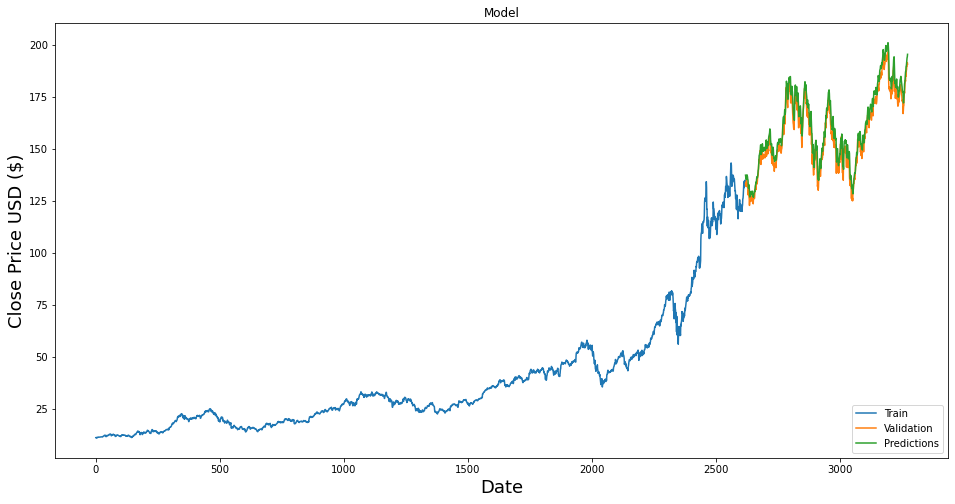

In [63]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Validation','Predictions'],loc='lower right')
plt.show()

In [64]:
valid

,Close,Predictions
2618,133.110001,137.304153
2619,133.500000,136.503311
2620,131.940002,136.191895
2621,134.320007,135.221634
2622,134.720001,136.190216
...,...,...
3267,188.009995,191.049698
3268,189.710007,192.142441
3269,189.690002,193.624313
3270,191.449997,194.130615


In [ ]:
apple_quote